**Target:**

- Adding some augmentations to train data. Added 7 degrees rotation and random cutout of 22X22 to make train set even harder. Should increase test accuracy if our augmentations are in right direction.

**Results:**

- Parameters: 7.86k
- Best Training Accuracy: 99.04
- Best Test Accuracy: 99.34

**Analysis:**

- Saw some improvement in test accuracy, but still not enough
- Test loss is not going down consistently. Will try reducing LR in steps in next step.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from models import Net6
from utils import train, test

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net6().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 12, 10, 10]             864
             ReLU-12           [-1, 12, 10, 10]               0
      BatchNorm2d-13           [-1, 12, 10, 10]              24
          Dropout-14           [-1, 12,

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                                transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
                                transforms.Resize((28, 28)),
                                transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [4]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [5]:
model = Net6().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)

Epoch 1


Train: Loss=0.1209 Batch_id=468 Accuracy=90.92: 100%|██████████| 469/469 [00:33<00:00, 14.07it/s]


Test set: Average loss: 0.0697, Accuracy: 9809/10000 (98.09%)

Epoch 2


Train: Loss=0.0601 Batch_id=468 Accuracy=97.80: 100%|██████████| 469/469 [00:29<00:00, 15.69it/s]


Test set: Average loss: 0.0657, Accuracy: 9795/10000 (97.95%)

Epoch 3


Train: Loss=0.0277 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:30<00:00, 15.51it/s]


Test set: Average loss: 0.0413, Accuracy: 9878/10000 (98.78%)

Epoch 4


Train: Loss=0.0906 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:30<00:00, 15.61it/s]


Test set: Average loss: 0.0358, Accuracy: 9898/10000 (98.98%)

Epoch 5


Train: Loss=0.0296 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:29<00:00, 15.83it/s]


Test set: Average loss: 0.0276, Accuracy: 9903/10000 (99.03%)

Epoch 6


Train: Loss=0.0181 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:30<00:00, 15.57it/s]


Test set: Average loss: 0.0288, Accuracy: 9909/10000 (99.09%)

Epoch 7


Train: Loss=0.0149 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:30<00:00, 15.43it/s]


Test set: Average loss: 0.0260, Accuracy: 9917/10000 (99.17%)

Epoch 8


Train: Loss=0.1119 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:29<00:00, 15.90it/s]


Test set: Average loss: 0.0261, Accuracy: 9915/10000 (99.15%)

Epoch 9


Train: Loss=0.0735 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:30<00:00, 15.44it/s]


Test set: Average loss: 0.0245, Accuracy: 9921/10000 (99.21%)

Epoch 10


Train: Loss=0.0155 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:30<00:00, 15.56it/s]


Test set: Average loss: 0.0221, Accuracy: 9932/10000 (99.32%)

Epoch 11


Train: Loss=0.0438 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:29<00:00, 15.65it/s]


Test set: Average loss: 0.0247, Accuracy: 9922/10000 (99.22%)

Epoch 12


Train: Loss=0.0245 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:31<00:00, 15.01it/s]


Test set: Average loss: 0.0210, Accuracy: 9931/10000 (99.31%)

Epoch 13


Train: Loss=0.0364 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:30<00:00, 15.61it/s]


Test set: Average loss: 0.0215, Accuracy: 9932/10000 (99.32%)

Epoch 14


Train: Loss=0.0519 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:29<00:00, 15.68it/s]


Test set: Average loss: 0.0200, Accuracy: 9933/10000 (99.33%)

Epoch 15


Train: Loss=0.1068 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:30<00:00, 15.33it/s]


Test set: Average loss: 0.0202, Accuracy: 9934/10000 (99.34%)



Text(0.5, 1.0, 'Test Accuracy')

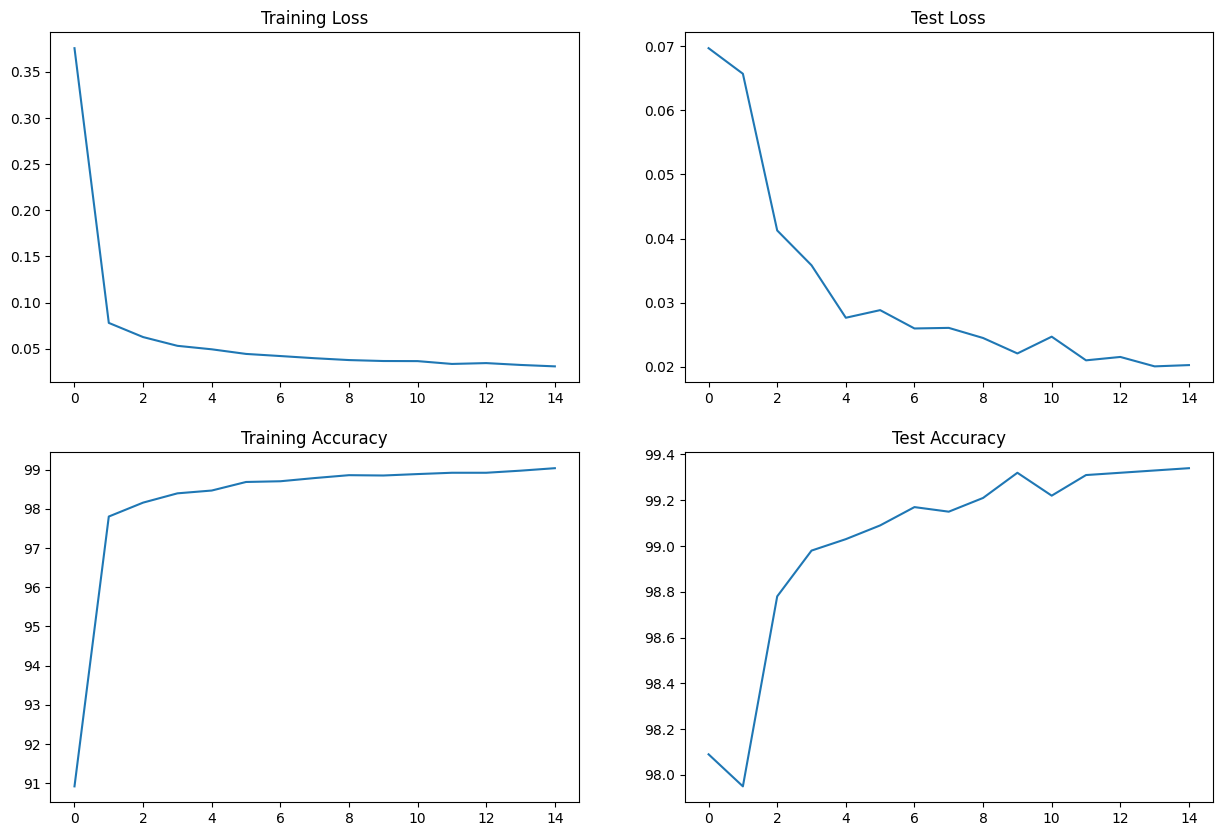

In [6]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [7]:
print("best train accuracy : ", max(train_acc))
print("best test accuracy : ", max(test_acc))

best train accuracy :  99.035
best test accuracy :  99.34


In [8]:
print("best train loss : ", min(train_losses))
print("best test loss : ", min(test_losses))

best train loss :  0.030972459860372423
best test loss :  0.02004495724737644
